## Movie Recommender

In this project, we will present a built movie recommendation model that is based on various similarity measures. We use methods such as Euclidean distance, cosine distance, and chi-square distance to propose movies similar to the one the user has input.

Before we proceed to building the model, let's familiarize ourselves with the measures we are based on.

### Euclidean Distance

Euclidean distance is one of the most commonly used distance measures in multidimensional space. It is a measure of the straight line between two points in space.

In two-dimensional Euclidean space (e.g., on a plane), the distance $d$ between two points $(x_1, y_1)$ and $(x_2, y_2)$ is calculated using the formula:

$$ d_E = \sqrt{(x_2 - x_1)^2 + (y_2 - y_1)^2} $$

Generally, in $n$-dimensional space, for points with coordinates $P = (p_1, p_2, ..., p_n)$ and $Q = (q_1, q_2, ..., q_n)$, the Euclidean distance is expressed by the formula:

$$ d_E(\mathbf{P}, \mathbf{Q}) = \sqrt{\sum_{i=1}^{n} (p_i - q_i)^2} $$

### Cosine Similarity

Cosine similarity measures the similarity between two vectors based on the angle between them. It is a measure that does not consider the direction of the vectors. It is particularly useful in text analysis and high-dimensional data, where vectors often represent the frequency of different features.

For two vectors $\mathbf{A}$ and $\mathbf{B}$ in n-dimensional space, cosine similarity is defined as:

$$S_C(\mathbf{A}, \mathbf{B}) = \frac{\mathbf{A} \cdot \mathbf{B}}{\|\mathbf{A}\| \|\mathbf{B}\|} $$

Where:
- $\mathbf{A} \cdot \mathbf{B}$ denotes the dot product of the two vectors,
- $\|\mathbf{A}\|$ and $\|\mathbf{B}\|$ denote the norm (length) of these vectors.

Cosine distance, for such defined cosine similarity, is defined as:

$$d_C(\mathbf{A}, \mathbf{B}) = 1 - S_C(\mathbf{A}, \mathbf{B})$$

### Chi-Square Distance
The chi-square distance is used for comparing data distributions. It is particularly useful for categorical data and histograms. It compares the differences between observed and expected values of features, normalizing them by their sum.

Generally, in $n$-dimensional space, for points with coordinates $P = (p_1, p_2, ..., p_n)$ and $Q = (q_1, q_2, ..., q_n)$, the chi-square distance is expressed by the formula:

$$d_{\chi^2}(\mathbf{P}, \mathbf{Q}) = \sum_{i=1}^n \frac{(p_i - q_i)^2}{p_i+q_i} $$



In order to create the model, we use the following libraries:
- `pandas` - used for data analysis, cleaning, and manipulation.
- `seaborn` and `matplotlib` - used for data visualization.
- `numpy` - used for numerical data processing and performing calculations necessary for movie analysis.
- `ipywidgets` and `display` - used to create a user-friendly interface.



In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import ipywidgets as widgets
from IPython.display import display, HTML

### Dataset
The dataset contains information about movies from various years, genres, and countries. It consists of 19 columns, each describing different aspects of each movie.

- filmtv_id - unique identifier
- title
- year
- genre
- duration 
- country
- directors
- actors
- avg_vote - average movie rating
- critics_vote - critics' rating
- public_vote - public rating
- total_votes - number of votes cast for the movie
- description
- notes - additional notes
- humor - humor rating
- rhythm - rhythm rating
- effort - effort rating
- tension - tension rating
- erotism - erotic elements rating


Let's load our dataset, and look at its structure. In the cell below, load your `filmtv_movies.csv` file path. 

You can download the file on kaggle website. 
Here is link: https://www.kaggle.com/datasets/stefanoleone992/filmtv-movies-dataset

In [2]:
file_path = r"C:\Users\patry\OneDrive\Dokumenty\filmtv_movies.csv"

Raw_data_frame = pd.read_csv(file_path)
Raw_data_frame.head()

,filmtv_id,title,year,genre,duration,country,directors,actors,avg_vote,critics_vote,public_vote,total_votes,description,notes,humor,rhythm,effort,tension,erotism
0,2,Bugs Bunny's Third Movie: 1001 Rabbit Tales,1982,Animation,76,United States,"David Detiege, Art Davis, Bill Perez",NaN,7.7,8.00,7.0,22,"With two protruding front teeth, a slightly sl...","These are many small independent stories, whic...",3,3,0,0,0
1,3,18 anni tra una settimana,1991,Drama,98,Italy,Luigi Perelli,"Kim Rossi Stuart, Simona Cavallari, Ennio Fant...",6.5,6.00,7.0,4,"Samantha, not yet eighteen, leaves the comfort...","Luigi Perelli, the director of the ""Piovra"", o...",0,2,0,2,0
2,17,Ride a Wild Pony,1976,Romantic,91,United States,Don Chaffey,"Michael Craig, John Meillon, Eva Griffith, Gra...",5.7,6.00,5.0,10,"In the Australia of the pioneers, a boy and a ...","""Ecological"" story with a happy ending, not wi...",1,2,1,0,0
3,18,Diner,1982,Comedy,95,United States,Barry Levinson,"Mickey Rourke, Steve Guttenberg, Ellen Barkin,...",7.0,8.00,6.0,18,Five boys from Baltimore have a habit of meeti...,A cast of will be famous for Levinson's direct...,2,2,0,1,2
4,20,A che servono questi quattrini?,1942,Comedy,85,Italy,Esodo Pratelli,"Eduardo De Filippo, Peppino De Filippo, Clelia...",5.9,5.33,7.0,15,"With a stratagem, the penniless and somewhat p...",Taken from the play by Armando Curcio that the...,3,1,1,0,0


### EDA

Let's take a look at some of the characteristics of our dataset. This will give us a better understanding of the material we are working on and the potential end results.

####  Films year histogram

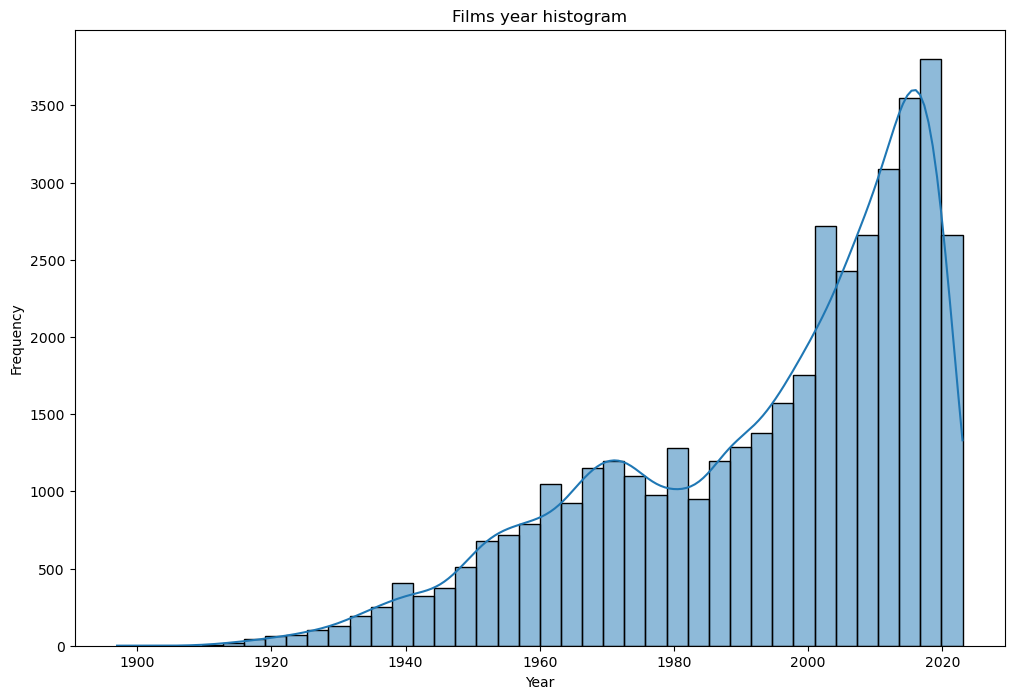

In [3]:
plt.figure(figsize=(12, 8))
sns.histplot(Raw_data_frame['year'], bins=40, kde=True)
plt.title('Films year histogram')
plt.xlabel('Year')
plt.ylabel('Frequency')
plt.show()

A significant portion of the films in the dataset are from the late 20th and early 21st centuries and above. We might have expected it. It was a time of development and globalization of new technologies.

#### Films average rating histogram

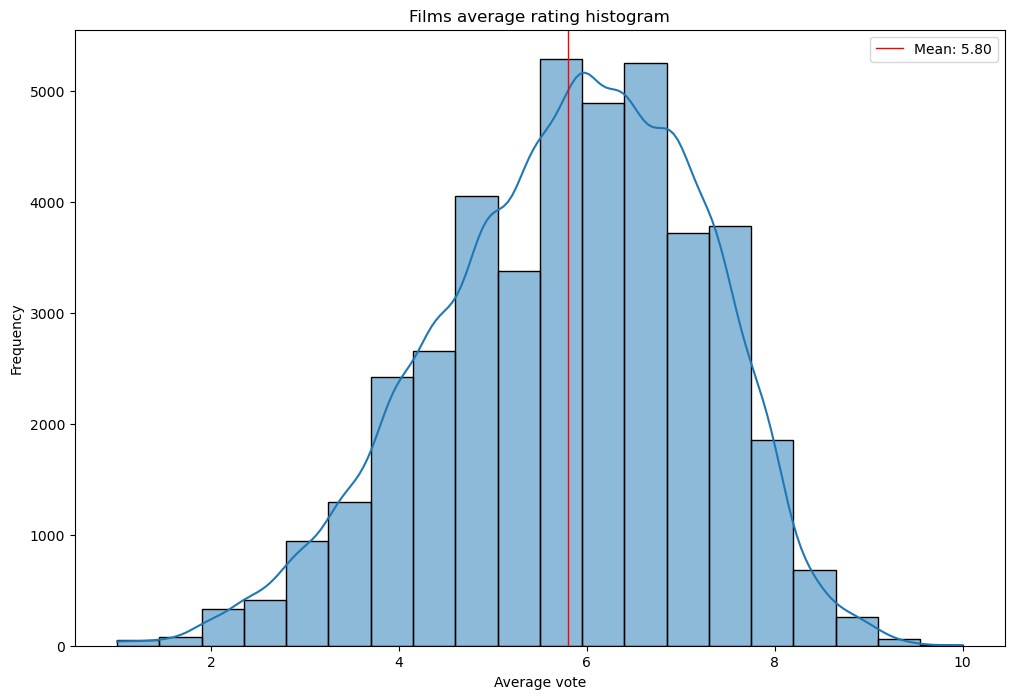

In [4]:
average_vote_mean = Raw_data_frame['avg_vote'].mean()

plt.figure(figsize=(12, 8))
sns.histplot(Raw_data_frame['avg_vote'], bins=20, kde=True)
plt.axvline(average_vote_mean, color='r', linewidth=1, label=f'Mean: {average_vote_mean:.2f}')
plt.title('Films average rating histogram')
plt.xlabel('Average vote')
plt.ylabel('Frequency')
plt.legend()
plt.show()

The histogram of average movie ratings shows that most movies receive ratings in the range of `4 to 7`, with an average rating of about `5.80`. The distribution shows a slight rightward slant, suggesting that movies with very high ratings are rarer. Overall, film ratings are moderate, indicating the varying quality of films in the dataset. A peak around the mean value indicates a concentration of ratings around that value.

#### Films genre distribution

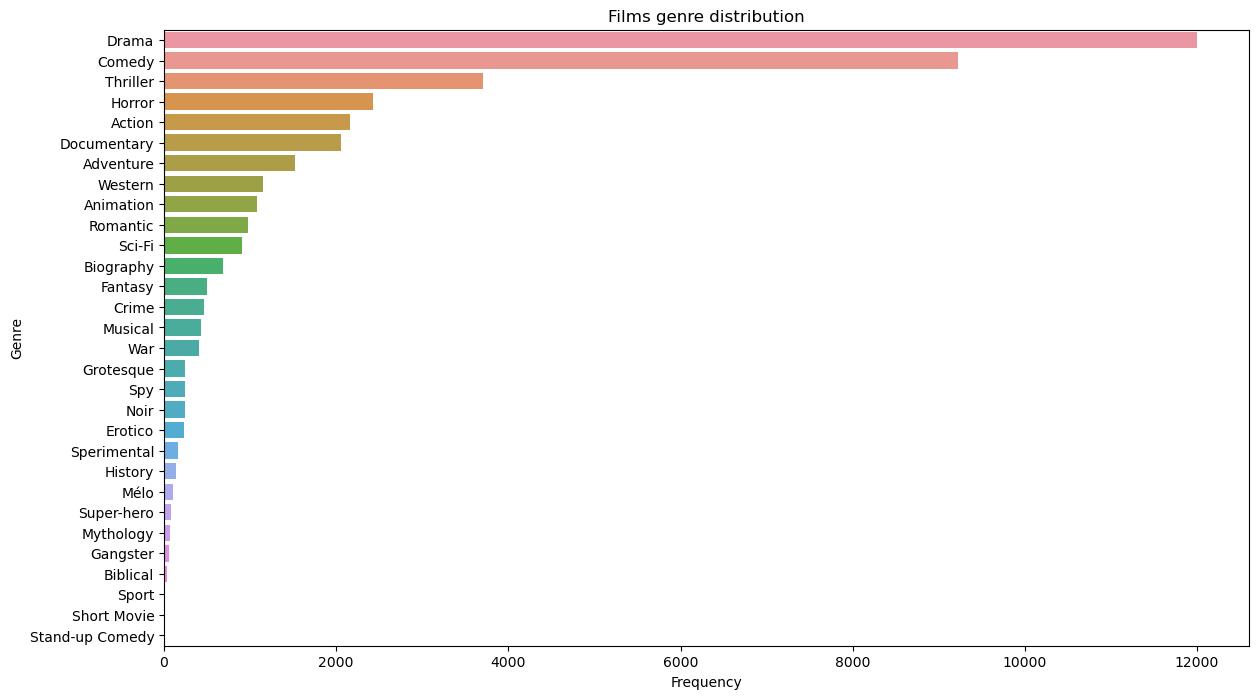

In [5]:
plt.figure(figsize=(14, 8))
sns.countplot(y='genre', data=Raw_data_frame, order=Raw_data_frame['genre'].value_counts().index)
plt.title('Films genre distribution')
plt.xlabel('Frequency')
plt.ylabel('Genre')
plt.show()

The `drama` genre dominates the dataset, with `comedy` and `thriller` also ranking high in terms of number of films. The distribution indicates a wide variety of genres, with the popularity of both major and less popular genres. Smaller genres, such as `stand-up comedy`, `short film`, `sports` and `biblical`, are represented much less frequently, confirming their niche nature.

#### Average vote mean for each genre

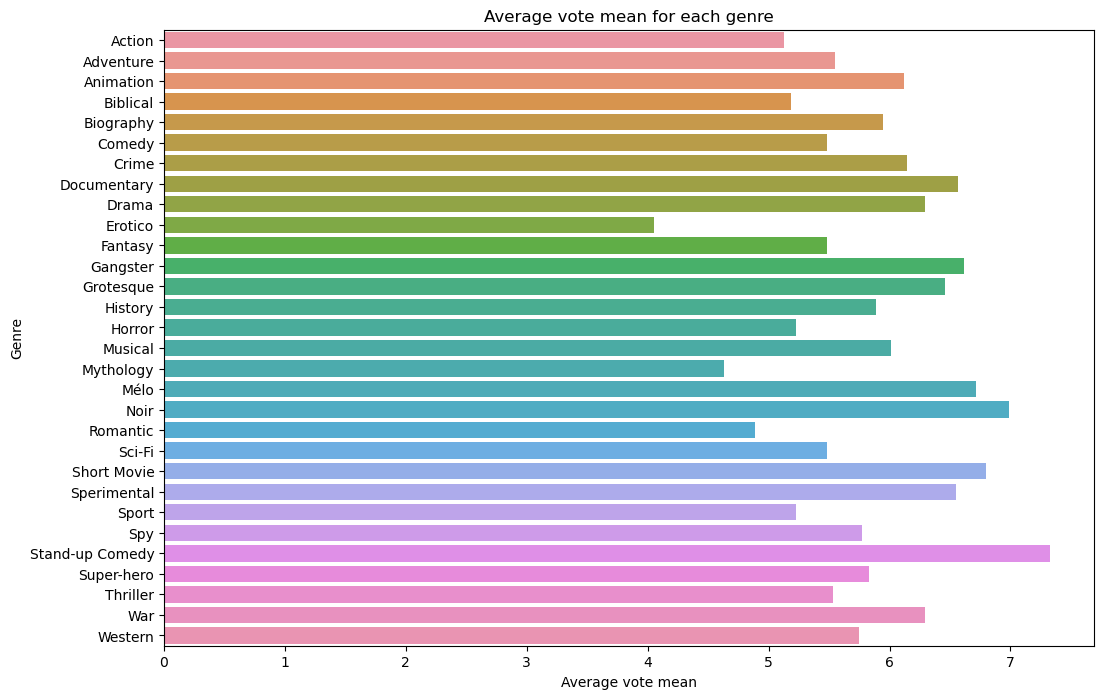

In [6]:
avg_vote_by_genre = Raw_data_frame.groupby('genre')['avg_vote'].mean().reset_index()

plt.figure(figsize=(12, 8))
sns.barplot(x='avg_vote', y='genre', data=avg_vote_by_genre)
plt.xlabel('Average vote mean')
plt.ylabel('Genre')
plt.title('Average vote mean for each genre')
plt.show()

#### Duration mean for each genre

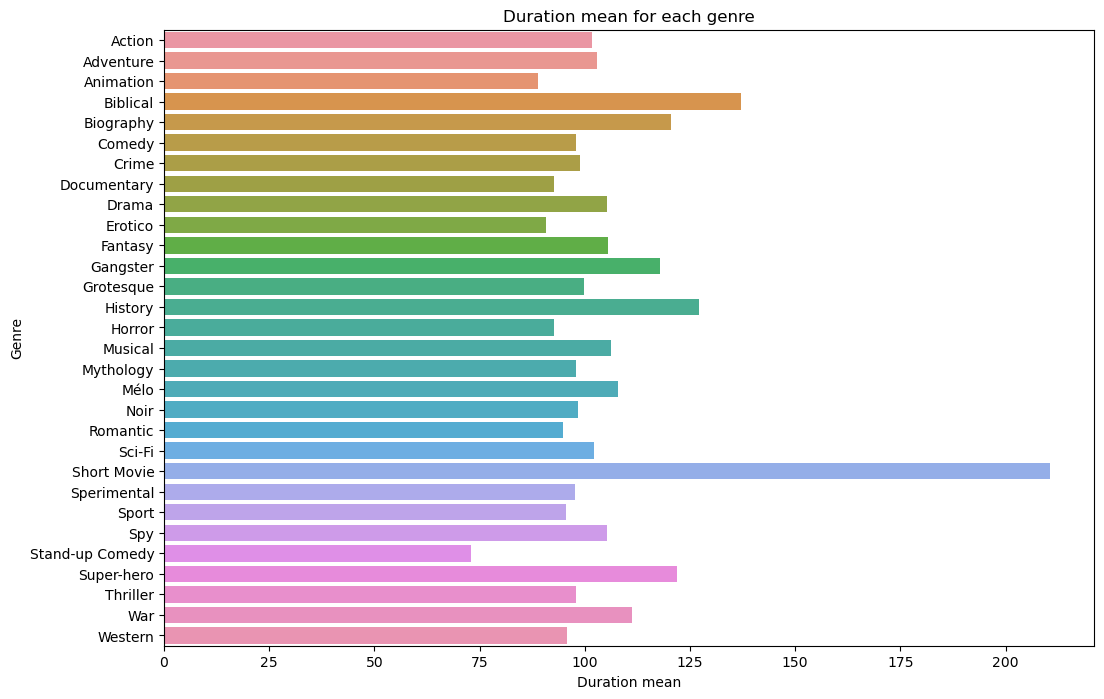

In [7]:
avg_duration_by_genre = Raw_data_frame.groupby('genre')['duration'].mean().reset_index()

plt.figure(figsize=(12, 8))
sns.barplot(x='duration', y='genre', data=avg_duration_by_genre)
plt.xlabel('Duration mean')
plt.ylabel('Genre')
plt.title('Duration mean for each genre')
plt.show()

We can see a strange anomaly in the data, namely, films in the `Short Movie` genre have the highest mean duration value.

#### Empty cells heatmap

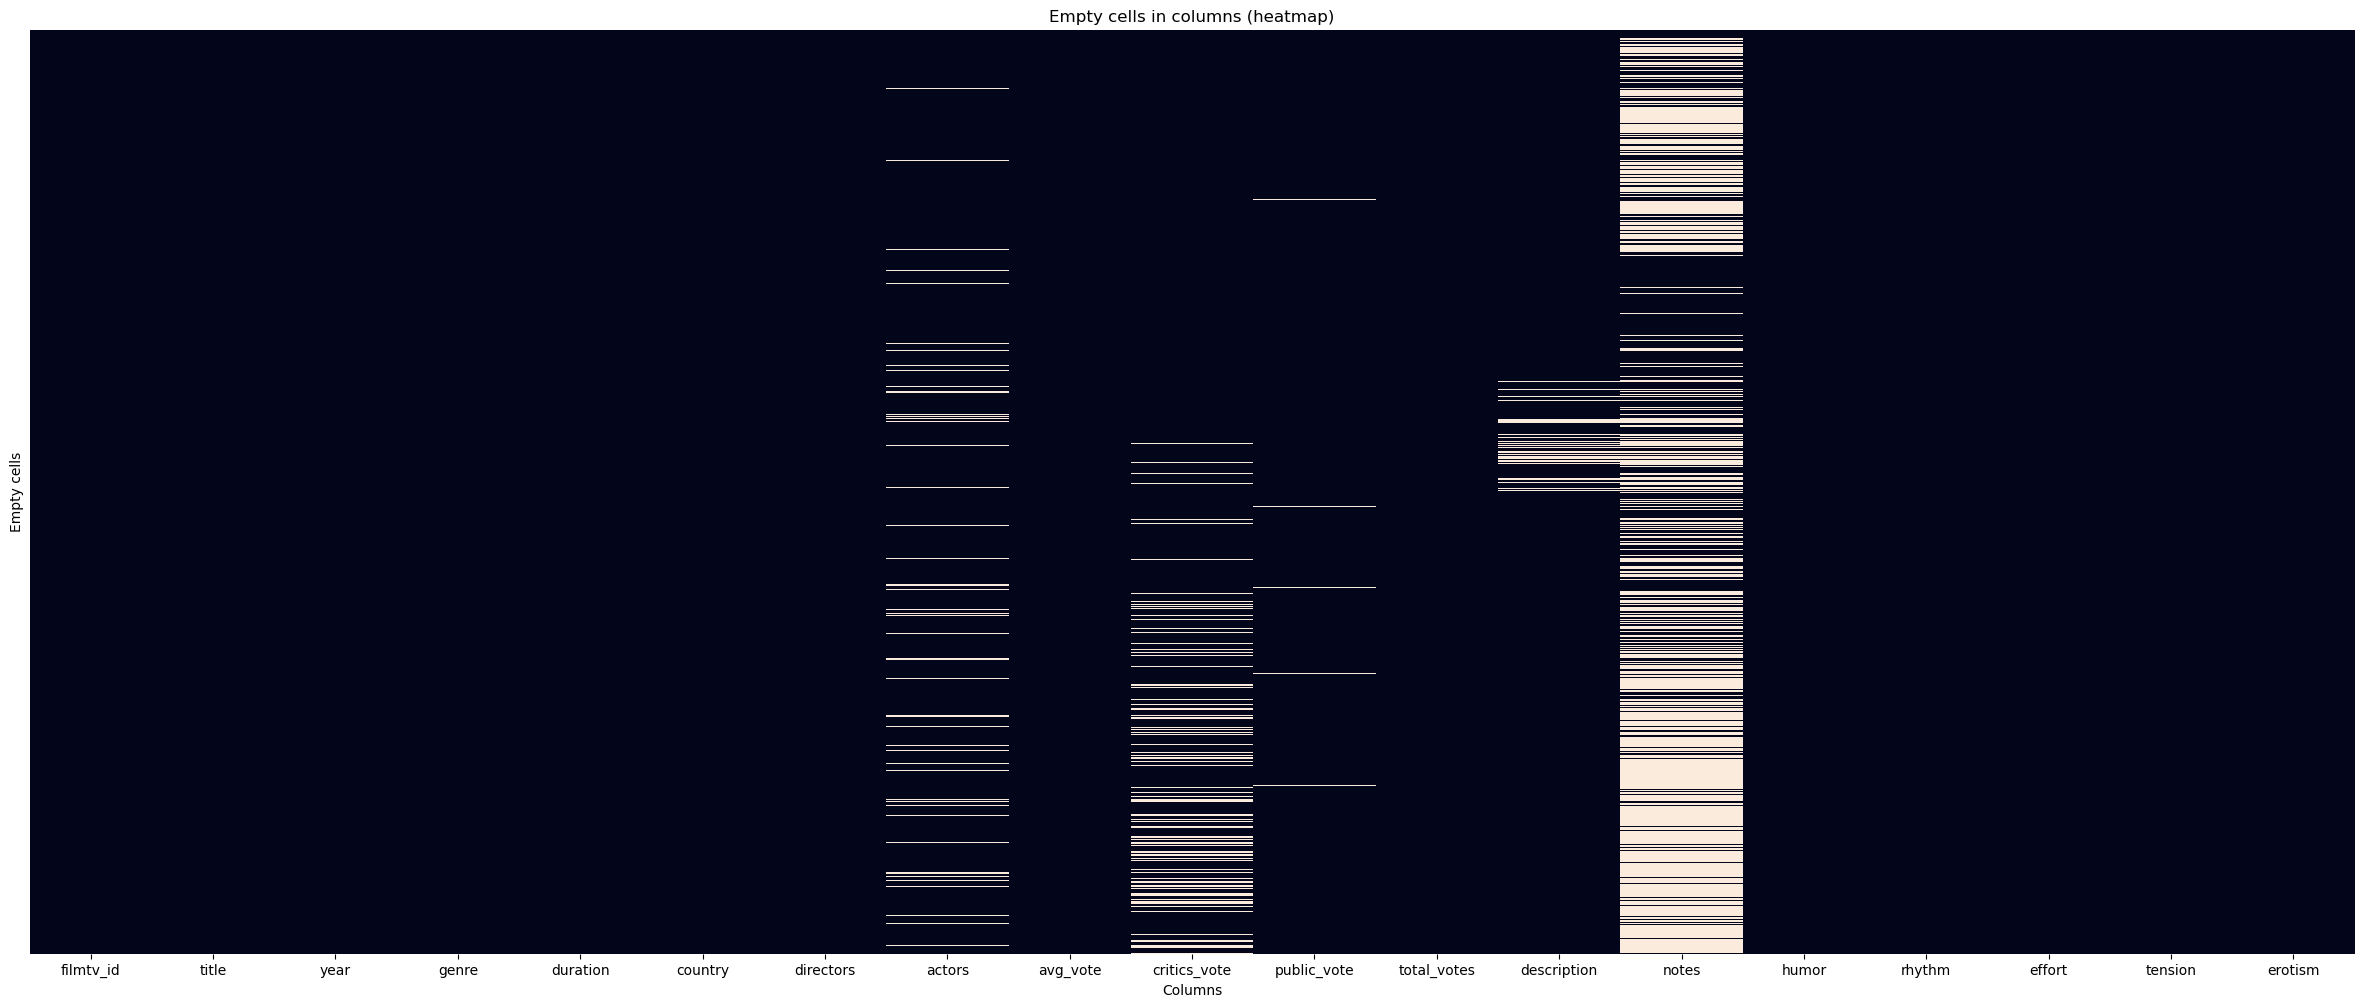

In [8]:
plt.figure(figsize=(30, 12))
sns.heatmap(Raw_data_frame.isnull(),yticklabels=False, cbar=False)
plt.title('Empty cells in columns (heatmap)')
plt.xlabel('Columns')
plt.ylabel('Empty cells')
plt.show()

The `directors`, `actors`, `critics_vote` and `notes` columns have a significant number of missing values. In particular, the `notes` column has many missing data, suggesting that additional notes about movies are not available for many records. Given this, we will remove the `notes`, and `description` columns in the remainder of this paper, as we will not be working on them. The other columns have few or no missing values. Regarding the `critics vote` and `public vote` columns, we assume that if they are empty, the videos were most likely insignificant, and therefore we will replace the empty values with zeros. We will also remove the `actors` column. We will focus on the movie recommender with its use in the next version of the work. 

### Data processing

We will now define a function that will change the column type. Let's look at the current type of column `directors`.

In [9]:
print(Raw_data_frame['directors'][0])
print(type(Raw_data_frame['directors'][0]))

David Detiege, Art Davis, Bill Perez
<class 'str'>


We will want to change the data on the lists. 

In [10]:
def directors_split(df):
    df = df.copy()
    df = df.fillna(0)
    
    for col in df.columns:
        if df[col].dtype == 'bool':
            df[col] = df[col].astype(int)
    
    for i in range(df.shape[0]):
        if df['directors'].iloc[i] != 0:
            df.at[i, 'directors'] = df['directors'].iloc[i].split(', ')
    
    return df

Data_frame = directors_split(Raw_data_frame)


Let's look at what the data type in the directors column looks like now, and how the entire dataset looks.

In [11]:
print(Data_frame['directors'][0])
print(type(Data_frame['directors'][0]))
Data_frame.head()

['David Detiege', 'Art Davis', 'Bill Perez']
<class 'list'>


,filmtv_id,title,year,genre,duration,country,directors,actors,avg_vote,critics_vote,public_vote,total_votes,description,notes,humor,rhythm,effort,tension,erotism
0,2,Bugs Bunny's Third Movie: 1001 Rabbit Tales,1982,Animation,76,United States,"[David Detiege, Art Davis, Bill Perez]",0,7.7,8.00,7.0,22,"With two protruding front teeth, a slightly sl...","These are many small independent stories, whic...",3,3,0,0,0
1,3,18 anni tra una settimana,1991,Drama,98,Italy,[Luigi Perelli],"Kim Rossi Stuart, Simona Cavallari, Ennio Fant...",6.5,6.00,7.0,4,"Samantha, not yet eighteen, leaves the comfort...","Luigi Perelli, the director of the ""Piovra"", o...",0,2,0,2,0
2,17,Ride a Wild Pony,1976,Romantic,91,United States,[Don Chaffey],"Michael Craig, John Meillon, Eva Griffith, Gra...",5.7,6.00,5.0,10,"In the Australia of the pioneers, a boy and a ...","""Ecological"" story with a happy ending, not wi...",1,2,1,0,0
3,18,Diner,1982,Comedy,95,United States,[Barry Levinson],"Mickey Rourke, Steve Guttenberg, Ellen Barkin,...",7.0,8.00,6.0,18,Five boys from Baltimore have a habit of meeti...,A cast of will be famous for Levinson's direct...,2,2,0,1,2
4,20,A che servono questi quattrini?,1942,Comedy,85,Italy,[Esodo Pratelli],"Eduardo De Filippo, Peppino De Filippo, Clelia...",5.9,5.33,7.0,15,"With a stratagem, the penniless and somewhat p...",Taken from the play by Armando Curcio that the...,3,1,1,0,0


That's exactly what we expected.

Now let's define a `preprocessing` function that transforms the data frame, creates categorical variables for selected columns, deletes specific columns and fills in missing values with zeros. In addition, it converts logical values to integer values for data consistency. Finally, it returns the transformed data frame ready for further analysis or modeling

In [12]:
def preprocessing(df,c_dummy,c_drop):
    df = df.copy()
    df = pd.get_dummies(df, columns=c_dummy)

    df= df.drop(c_drop, axis = 1)

    df = df.fillna(0)

    for col in df.columns:
        if df[col].dtype == 'bool':
            df[col] = df[col].astype(int)


    return df

We will now prepare the dataset on which we will work first. We will remove the `directors`, `actors`, `notes`, `description`, and `filmtv_id` columns. If we look at the `filmtv_id`, we can see that something is wrong with it. We will also replace the `genre` and `country` with dummy columns.

In [13]:
columns_dummy=['genre','country']
columns_drop = ['directors','actors','notes','description','filmtv_id']

Data_frame_input = preprocessing(Data_frame, columns_dummy, columns_drop)

Data_frame_input.head()

,title,year,duration,avg_vote,critics_vote,public_vote,total_votes,humor,rhythm,effort,...,country_Yemen,country_Yugoslavia,"country_Yugoslavia, France","country_Yugoslavia, France, Germany","country_Yugoslavia, France, Germany, Hungary","country_Yugoslavia, France, Greece, Macedonia, Turkey","country_Yugoslavia, Germany","country_Yugoslavia, Germany, Italy","country_Yugoslavia, Italy","country_Yugoslavia, Italy, Germany, United States"
0,Bugs Bunny's Third Movie: 1001 Rabbit Tales,1982,76,7.7,8.00,7.0,22,3,3,0,...,0,0,0,0,0,0,0,0,0,0
1,18 anni tra una settimana,1991,98,6.5,6.00,7.0,4,0,2,0,...,0,0,0,0,0,0,0,0,0,0
2,Ride a Wild Pony,1976,91,5.7,6.00,5.0,10,1,2,1,...,0,0,0,0,0,0,0,0,0,0
3,Diner,1982,95,7.0,8.00,6.0,18,2,2,0,...,0,0,0,0,0,0,0,0,0,0
4,A che servono questi quattrini?,1942,85,5.9,5.33,7.0,15,3,1,1,...,0,0,0,0,0,0,0,0,0,0


We can now see that the data we have prepared has a structure that is friendly to building a first recommendation model on it. Each row consists of a title, and a corresponding numeric vector. Thus, we will be able to easily count the distances between our chosen title and the other records. But before we get to that, let's further define the functions that count distances.

### Similarity measures functions

Let's remind that:

##### Euclidean distance:
$$ d_E(\mathbf{P}, \mathbf{Q}) = \sqrt{\sum_{i=1}^{n} (p_i - q_i)^2} $$

In [14]:
def Euclid_distance(x,y):
    if np.all(x == y):
        dist = np.linalg.norm(y)
    else:
        dist = np.sqrt(np.sum((x-y)**2))
    return dist

##### Cosine distance:
$$S_C(\mathbf{A}, \mathbf{B}) = \frac{\mathbf{A} \cdot \mathbf{B}}{\|\mathbf{A}\| \|\mathbf{B}\|} $$

$$d_C(\mathbf{A}, \mathbf{B}) = 1 - S_C(\mathbf{A}, \mathbf{B})$$

In [15]:
def Cosine_distance(x,y):
    if np.all(x == y):
        similarity = -1
    else:
        similarity = np.dot(x,y)/(np.linalg.norm(x)*np.linalg.norm(y))
    distance = 1 - similarity
    return distance

##### Chi-square distance

$$d_{\chi^2}(\mathbf{P}, \mathbf{Q}) = \sum_{i=1}^n \frac{(p_i - q_i)^2}{p_i+q_i} $$

In [16]:
def Chi_square_distance(x,y):
    epsilon = 1e-10
    if np.all(x == y):
        distance = np.linalg.norm(y)
    else:
        distance = np.sum((x-y)**2/(x+y+epsilon))
    return distance

Now we are ready to build first model.

### The first movie recommendation model

Let's define the function `recommend_me_some_films`, which is a tool for recommending movies based on various distance measures and additional criteria such as year of production and movie duration

The steps that the function performs:
1. Normalizes the 'year' and 'duration' columns if 'alternative' is selected.
2. Asks the user to enter the title of the movie.
3. Compares the selected movie with others using the selected distance measure.
4. Sorts the movies by distance and returns the n closest movies.
5. Creates a DataFrame with the recommended titles and the original movie.

In [17]:
def recommend_me_some_films(df, n = 1, measure = 'Euclid', year_importance = 'classic', duration_importance = 'classic'):

    if year_importance == 'alternative':
        df['year'] = (df['year'] - df['year'].min())/10

    if duration_importance == 'alternative':
        df['duration'] = (df['duration']- df['duration'].min())/100

    Y = df['title'].to_numpy()
    X = df.drop('title', axis=1).to_numpy()

    film = input("Enter the film title:")

    Y_index = np.where(Y == film)[0][0]

    film_vector = X[Y_index,:]

    l = X.shape[0]

    list_distances = []

    if measure == 'Mixed':
        list_distances_E = []
        list_distances_C = []
        list_distances_CS = []
        for i in range(l):
            vector = X[i,:]
            distance_E = Euclid_distance(film_vector, vector)
            distance_C = Cosine_distance(film_vector, vector)
            distance_CS = Chi_square_distance(film_vector, vector)
            list_distances_E.append(distance_E)
            list_distances_C.append(distance_C)
            list_distances_CS.append(distance_CS)

        distances_vector_E = np.array(list_distances_E).reshape(-1,1)
        distances_vector_C = np.array(list_distances_C).reshape(-1,1)
        distances_vector_CS = np.array(list_distances_CS).reshape(-1,1)

        Data = np.hstack([X,distances_vector_E, distances_vector_C, distances_vector_CS])

        titles = Y.reshape(-1,1)

        Data_title = np.hstack([titles,Data])

        sorting_indexes_E = np.argsort(Data_title[:, -3])
        sorting_indexes_C = np.argsort(Data_title[:, -2])
        sorting_indexes_CS = np.argsort(Data_title[:, -1])

        sorted_matrix_E = Data_title[sorting_indexes_E]
        sorted_matrix_C = Data_title[sorting_indexes_C]
        sorted_matrix_CS = Data_title[sorting_indexes_CS]
        
        
        nearest_titles_E = sorted_matrix_E[:n,0]
        nearest_titles_C = sorted_matrix_C[:n,0]
        nearest_titles_CS = sorted_matrix_CS[:n,0]

        titles_list = (nearest_titles_E, nearest_titles_C, nearest_titles_CS)

        combined_list = []
        for titles in titles_list:
            combined_list.extend(titles)

        unique_titles = list(set(combined_list))

        df_titles_mixed = pd.DataFrame(unique_titles,columns=["Titles"])
        df_titles_mixed['Chosen_film'] = ''
        df_titles_mixed.loc[0, 'Chosen_film'] = film

        return (df_titles_mixed)

    else:
        for i in range(l):
            vector  = X[i,:]

            if measure == 'Cosine':
                distance = Cosine_distance(film_vector,vector)
            elif measure == 'Chi_square':
                distance = Chi_square_distance(film_vector,vector)
            elif measure == 'Euclid':
                distance = Euclid_distance(film_vector,vector)

            list_distances.append(distance)

        distances_vector = np.array(list_distances).reshape(-1,1)
        Data = np.hstack([X,distances_vector])
        titles = Y.reshape(-1,1)
        Data_title = np.hstack([titles,Data])

        sorting_indexes = np.argsort(Data_title[:, -1])

        sorted_matrix = Data_title[sorting_indexes]
        
        nearest_titles = sorted_matrix[:n,0]

        df_titles = pd.DataFrame(nearest_titles,columns=["Titles"])
        df_titles['Chosen_film'] = ''
        df_titles.loc[0, 'Chosen_film'] = film
        return (df_titles)

Now let's try our function.

In [73]:
recommend_me_some_films(Data_frame_input, n = 5, measure = 'Mixed', year_importance = 'classic', duration_importance='classic')

,Titles,Chosen_film
0,La grande bellezza,Interstellar
1,Inception,
2,The Dark Knight,
3,The Blues Brothers,
4,The Godfather,
5,Kill Bill: vol. 2,
6,The Departed,
7,The Hateful Eight,


### The second model for recommending movies

Let's define another function `recommend_me_some_films_d`, which also recommends movies, taking into account additionally the director as a similarity criterion.

The steps that the function performs:
1. Normalizes the `year` and `duration` columns if ` alternative` is selected.
2. If 'alternative' is selected for directors, takes into account their influence on the similarity of movies.
3. Asks the user to enter the title of the movie.
4. Compares the selected movie with others using the selected distance measure.
5. Sorts movies by distance and returns the n closest movies.
6. Creates a DataFrame with recommended titles and the original movie.

In [18]:
def recommend_me_some_films_d(df, n=1, measure='Euclid', year_importance='classic', duration_importance='classic', directors_importance='classic'):

    if directors_importance == 'classic':
        df.drop('directors', axis=1)

    if year_importance == 'alternative':
        df['year'] = (df['year'] - df['year'].min()) / 10

    if duration_importance == 'alternative':
        df['duration'] = (df['duration'] - df['duration'].min()) / 100

    Y = df['title'].to_numpy()
    X = df.drop('title', axis=1).to_numpy()

    film = input("Enter the film title:")

    Y_index = np.where(Y == film)[0][0]

    film_vector = X[Y_index, :]

    l = X.shape[0]

    if directors_importance == 'alternative':
        film_vector = np.hstack((film_vector, 0))
        result = []
        for i in range(l):
            vector = X[i, :]
            if isinstance(film_vector[2], int) or isinstance(vector[2], int):
                director_measure = 15
            else:
                director_measure = 0
                for j in range(len(film_vector[2])):
                    for k in range(len(vector[2])):
                        if film_vector[2][j] != vector[2][k]:
                            director_measure += 5

            result.append(np.hstack((X[i], director_measure)))

        X = np.array(result, dtype=object)

        columns_to_remove = [2]

        X = np.delete(X, columns_to_remove, axis=1)
        film_vector = np.delete(film_vector, columns_to_remove)

    list_distances = []

    if measure == 'Mixed':
        list_distances_E = []
        list_distances_C = []
        list_distances_CS = []
        for i in range(l):
            vector = X[i, :]
            distance_E = Euclid_distance(film_vector, vector)
            distance_C = Cosine_distance(film_vector, vector)
            distance_CS = Chi_square_distance(film_vector, vector)
            list_distances_E.append(distance_E)
            list_distances_C.append(distance_C)
            list_distances_CS.append(distance_CS)

        distances_vector_E = np.array(list_distances_E).reshape(-1, 1)
        distances_vector_C = np.array(list_distances_C).reshape(-1, 1)
        distances_vector_CS = np.array(list_distances_CS).reshape(-1, 1)

        Data = np.hstack([X, distances_vector_E, distances_vector_C, distances_vector_CS])

        titles = Y.reshape(-1, 1)

        Data_title = np.hstack([titles, Data])

        sorting_indexes_E = np.argsort(Data_title[:, -3])
        sorting_indexes_C = np.argsort(Data_title[:, -2])
        sorting_indexes_CS = np.argsort(Data_title[:, -1])

        sorted_matrix_E = Data_title[sorting_indexes_E]
        sorted_matrix_C = Data_title[sorting_indexes_C]
        sorted_matrix_CS = Data_title[sorting_indexes_CS]

        nearest_titles_E = sorted_matrix_E[:n, 0]
        nearest_titles_C = sorted_matrix_C[:n, 0]
        nearest_titles_CS = sorted_matrix_CS[:n, 0]

        titles_list = (nearest_titles_E, nearest_titles_C, nearest_titles_CS)

        combined_list = []
        for titles in titles_list:
            combined_list.extend(titles)

        unique_titles = list(set(combined_list))

        df_titles_mixed = pd.DataFrame(unique_titles, columns=["Titles"])
        df_titles_mixed['Chosen_film'] = ''
        df_titles_mixed.loc[0, 'Chosen_film'] = film

        return df_titles_mixed

    else:
        for i in range(l):
            vector = X[i, :]

            if measure == 'Cosine':
                distance = Cosine_distance(film_vector, vector)
            elif measure == 'Chi_square':
                distance = Chi_square_distance(film_vector, vector)
            elif measure == 'Euclid':
                distance = Euclid_distance(film_vector, vector)

            list_distances.append(distance)

        distances_vector = np.array(list_distances).reshape(-1, 1)
        Data = np.hstack([X, distances_vector])
        titles = Y.reshape(-1, 1)
        Data_title = np.hstack([titles, Data])

        sorting_indexes = np.argsort(Data_title[:, -1])

        sorted_matrix = Data_title[sorting_indexes]

        nearest_titles = sorted_matrix[:n, 0]

        df_titles = pd.DataFrame(nearest_titles, columns=["Titles"])
        df_titles['Chosen_film'] = ''
        df_titles.loc[0, 'Chosen_film'] = film

        return df_titles

In the previous model we removed the directors column, this time we will leave it and test our recommender on such data.

In [19]:
columns_dummy=['genre','country']
columns_drop = ['actors','notes','description','filmtv_id']

Data_frame_d = preprocessing(Data_frame,columns_dummy,columns_drop)

Data_frame_d.head()

,title,year,duration,directors,avg_vote,critics_vote,public_vote,total_votes,humor,rhythm,...,country_Yemen,country_Yugoslavia,"country_Yugoslavia, France","country_Yugoslavia, France, Germany","country_Yugoslavia, France, Germany, Hungary","country_Yugoslavia, France, Greece, Macedonia, Turkey","country_Yugoslavia, Germany","country_Yugoslavia, Germany, Italy","country_Yugoslavia, Italy","country_Yugoslavia, Italy, Germany, United States"
0,Bugs Bunny's Third Movie: 1001 Rabbit Tales,1982,76,"[David Detiege, Art Davis, Bill Perez]",7.7,8.00,7.0,22,3,3,...,0,0,0,0,0,0,0,0,0,0
1,18 anni tra una settimana,1991,98,[Luigi Perelli],6.5,6.00,7.0,4,0,2,...,0,0,0,0,0,0,0,0,0,0
2,Ride a Wild Pony,1976,91,[Don Chaffey],5.7,6.00,5.0,10,1,2,...,0,0,0,0,0,0,0,0,0,0
3,Diner,1982,95,[Barry Levinson],7.0,8.00,6.0,18,2,2,...,0,0,0,0,0,0,0,0,0,0
4,A che servono questi quattrini?,1942,85,[Esodo Pratelli],5.9,5.33,7.0,15,3,1,...,0,0,0,0,0,0,0,0,0,0


In [76]:
recommend_me_some_films_d(Data_frame_d, n=5, measure='Mixed', year_importance='alternative', directors_importance='alternative')

,Titles,Chosen_film
0,Forrest Gump,Interstellar
1,La grande bellezza,
2,The Prestige,
3,The Hateful Eight,
4,Inception,
5,Into the Wild,
6,The Dark Knight,
7,Batman Begins,
8,The Godfather,
9,Kill Bill: vol. 2,


### A model with a user-friendly interface.

We need to modify our previous function to pass our chosen movie title to it differently.

In [20]:
def recommend_me_some_films_d_m(df, film, n=1, measure='Euclid', year_importance='classic', duration_importance='classic', directors_importance='classic'):
    if directors_importance == 'classic':
        df = df.drop('directors', axis=1)

    if year_importance == 'alternative':
        df['year'] = (df['year'] - df['year'].min()) / 10

    if duration_importance == 'alternative':
        df['duration'] = (df['duration'] - df['duration'].min()) / 100

    Y = df['title'].to_numpy()
    X = df.drop('title', axis=1).to_numpy()

    Y_index = np.where(Y == film)[0][0]
    film_vector = X[Y_index, :]

    l = X.shape[0]

    if directors_importance == 'alternative':
        film_vector = np.hstack((film_vector, 0))
        result = []
        for i in range(l):
            vector = X[i, :]
            if isinstance(film_vector[2], int) or isinstance(vector[2], int):
                director_measure = 15
            else:
                director_measure = 0
                for j in range(len(film_vector[2])):
                    for k in range(len(vector[2])):
                        if film_vector[2][j] != vector[2][k]:
                            director_measure += 5

            result.append(np.hstack((X[i], director_measure)))

        X = np.array(result, dtype=object)
        columns_to_remove = [2]
        X = np.delete(X, columns_to_remove, axis=1)
        film_vector = np.delete(film_vector, columns_to_remove)

    list_distances = []

    if measure == 'Mixed':
        list_distances_E = []
        list_distances_C = []
        list_distances_CS = []
        for i in range(l):
            vector = X[i, :]
            distance_E = Euclid_distance(film_vector, vector)
            distance_C = Cosine_distance(film_vector, vector)
            distance_CS = Chi_square_distance(film_vector, vector)
            list_distances_E.append(distance_E)
            list_distances_C.append(distance_C)
            list_distances_CS.append(distance_CS)

        distances_vector_E = np.array(list_distances_E).reshape(-1, 1)
        distances_vector_C = np.array(list_distances_C).reshape(-1, 1)
        distances_vector_CS = np.array(list_distances_CS).reshape(-1, 1)

        Data = np.hstack([X, distances_vector_E, distances_vector_C, distances_vector_CS])

        titles = Y.reshape(-1, 1)
        Data_title = np.hstack([titles, Data])

        sorting_indexes_E = np.argsort(Data_title[:, -3])
        sorting_indexes_C = np.argsort(Data_title[:, -2])
        sorting_indexes_CS = np.argsort(Data_title[:, -1])

        sorted_matrix_E = Data_title[sorting_indexes_E]
        sorted_matrix_C = Data_title[sorting_indexes_C]
        sorted_matrix_CS = Data_title[sorting_indexes_CS]

        nearest_titles_E = sorted_matrix_E[:n, 0]
        nearest_titles_C = sorted_matrix_C[:n, 0]
        nearest_titles_CS = sorted_matrix_CS[:n, 0]

        titles_list = (nearest_titles_E, nearest_titles_C, nearest_titles_CS)

        combined_list = []
        for titles in titles_list:
            combined_list.extend(titles)

        unique_titles = list(set(combined_list))

        df_titles_mixed = pd.DataFrame(unique_titles, columns=["Titles"])
        df_titles_mixed['Chosen_film'] = ''
        df_titles_mixed.loc[0, 'Chosen_film'] = film

        return df_titles_mixed

    else:
        for i in range(l):
            vector = X[i, :]

            if measure == 'Cosine':
                distance = Cosine_distance(film_vector, vector)
            elif measure == 'Chi_square':
                distance = Chi_square_distance(film_vector, vector)
            elif measure == 'Euclid':
                distance = Euclid_distance(film_vector, vector)

            list_distances.append(distance)

        distances_vector = np.array(list_distances).reshape(-1, 1)
        Data = np.hstack([X, distances_vector])
        titles = Y.reshape(-1, 1)
        Data_title = np.hstack([titles, Data])

        sorting_indexes = np.argsort(Data_title[:, -1])

        sorted_matrix = Data_title[sorting_indexes]

        nearest_titles = sorted_matrix[:n, 0]

        df_titles = pd.DataFrame(nearest_titles, columns=["Titles"])
        df_titles['Chosen_film'] = ''
        df_titles.loc[0, 'Chosen_film'] = film

        return df_titles

In [21]:
columns_dummy=['genre','country']
columns_drop = ['actors','notes','description','filmtv_id']

Data_frame_i = preprocessing(Data_frame,columns_dummy,columns_drop)

Data_frame_i.head()

,title,year,duration,directors,avg_vote,critics_vote,public_vote,total_votes,humor,rhythm,...,country_Yemen,country_Yugoslavia,"country_Yugoslavia, France","country_Yugoslavia, France, Germany","country_Yugoslavia, France, Germany, Hungary","country_Yugoslavia, France, Greece, Macedonia, Turkey","country_Yugoslavia, Germany","country_Yugoslavia, Germany, Italy","country_Yugoslavia, Italy","country_Yugoslavia, Italy, Germany, United States"
0,Bugs Bunny's Third Movie: 1001 Rabbit Tales,1982,76,"[David Detiege, Art Davis, Bill Perez]",7.7,8.00,7.0,22,3,3,...,0,0,0,0,0,0,0,0,0,0
1,18 anni tra una settimana,1991,98,[Luigi Perelli],6.5,6.00,7.0,4,0,2,...,0,0,0,0,0,0,0,0,0,0
2,Ride a Wild Pony,1976,91,[Don Chaffey],5.7,6.00,5.0,10,1,2,...,0,0,0,0,0,0,0,0,0,0
3,Diner,1982,95,[Barry Levinson],7.0,8.00,6.0,18,2,2,...,0,0,0,0,0,0,0,0,0,0
4,A che servono questi quattrini?,1942,85,[Esodo Pratelli],5.9,5.33,7.0,15,3,1,...,0,0,0,0,0,0,0,0,0,0


Now let's create an interface for the user.

In [23]:
film_input = widgets.Text(
    value='',
    placeholder='Enter the title:',
    description='Title:',
    disabled=False,
    layout=widgets.Layout(width='400px', margin='10px 0px')
)

n_input = widgets.IntText(
    value=1,
    description='Chose n:',
    disabled=False,
    layout=widgets.Layout(width='200px', margin='10px 0px')
)

measure_dropdown = widgets.Dropdown(
    options=['Euclid', 'Cosine', 'Chi_square', 'Mixed'],
    value='Euclid',
    description='Measure:',
    layout=widgets.Layout(width='300px', margin='10px 0px')
)

year_importance_dropdown = widgets.Dropdown(
    options=['classic', 'alternative'],
    value='classic',
    description='Year:',
    layout=widgets.Layout(width='300px', margin='10px 0px')
)

duration_importance_dropdown = widgets.Dropdown(
    options=['classic', 'alternative'],
    value='classic',
    description='Duration:',
    layout=widgets.Layout(width='300px', margin='10px 0px')
)

directors_importance_dropdown = widgets.Dropdown(
    options=['classic', 'alternative'],
    value='classic',
    description='Directors:',
    layout=widgets.Layout(width='300px', margin='10px 0px')
)

button = widgets.Button(
    description='Find similar:',
    disabled=False,
    button_style='info',
    tooltip='Click to execute',
    icon='search',
    layout=widgets.Layout(width='200px', margin='20px 0px')
)

output = widgets.Output()

def on_button_clicked(b):
    with output:
        output.clear_output()
        film = film_input.value
        n = n_input.value
        measure = measure_dropdown.value
        year_importance = year_importance_dropdown.value
        duration_importance = duration_importance_dropdown.value
        directors_importance = directors_importance_dropdown.value
        
        result = recommend_me_some_films_d_m(Data_frame_i, film, n, measure, year_importance, duration_importance, directors_importance)
        display(result)

button.on_click(on_button_clicked)

display(HTML("<style>.widget-inline-hbox > * { margin: 10px; } .widget-label { min-width: 100px; }</style>"))


widgets.VBox([
    widgets.HBox([film_input, n_input]),
    widgets.HBox([measure_dropdown]),
    widgets.HBox([year_importance_dropdown]),
    widgets.HBox([duration_importance_dropdown]),
    widgets.HBox([directors_importance_dropdown]),
    button,
    output
])

The interface works when you compile it in this notebook.

The next step is to add an actors column to the recommender, but we'll deal with that next time.